In [5]:
import time
import matplotlib.pyplot as plt

In [6]:
def is_safe(board, row, col, n):
    for i in range(col):
        if board[row][i] == 1:
            return False
    for i, j in zip(range(row, -1, -1), range(col, -1, -1)):
        if board[i][j] == 1:
            return False
    for i, j in zip(range(row, n, 1), range(col, -1, -1)):
        if board[i][j] == 1:
            return False
    return True

def solve_n_queens_util(board, col, n):
    if col >= n:
        return True
    for i in range(n):
        if board[i][col] != -1:  # Skip pre-placed queens and their implications
            continue
        if is_safe(board, i, col, n):
            board[i][col] = 1
            if solve_n_queens_util(board, col + 1, n):
                return True
            board[i][col] = -1
    return False

def pre_place_queens(board, positions):
    for row, col in positions:
        if not is_safe(board, row, col, len(board)):
            print(f"Error: Pre-placed queen at ({row}, {col}) is not in a safe position.")
            return False
        board[row][col] = 1
    return True

def solve_n_queens(n):
    board = [[-1 for _ in range(n)] for _ in range(n)]  # Use -1 for unsolved positions
    # Pre-place two queens for n >= 4
    if n >= 4:
        if not pre_place_queens(board, [(0, 0), (1, 2)]):
            return False
    return solve_n_queens_util(board, 0, n)

def measure_cpu_time(n):
    start_time = time.time()
    solve_n_queens(n)
    end_time = time.time()
    return end_time - start_time

CPU Time for n=4: 0.0 seconds
CPU Time for n=5: 0.0 seconds
CPU Time for n=6: 0.0 seconds
CPU Time for n=7: 0.001428365707397461 seconds
CPU Time for n=8: 0.0019941329956054688 seconds
CPU Time for n=9: 0.005637168884277344 seconds
CPU Time for n=10: 0.019338130950927734 seconds
CPU Time for n=11: 0.055182456970214844 seconds
CPU Time for n=12: 0.21180963516235352 seconds
CPU Time for n=13: 1.083094596862793 seconds
CPU Time for n=14: 6.9481236934661865 seconds
CPU Time for n=15: 45.193313121795654 seconds
CPU Time for n=16: 288.5959393978119 seconds
CPU Time for n=17: 2125.2203464508057 seconds


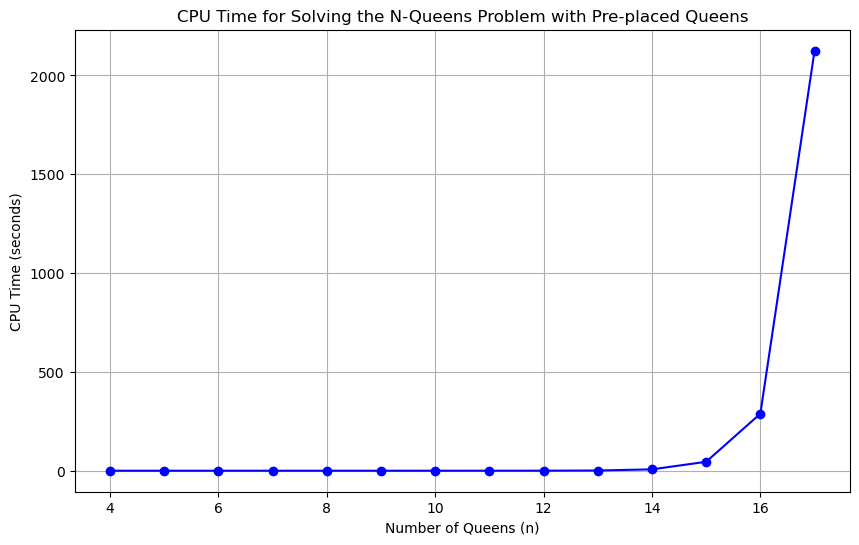

In [8]:
# Define the range of n values to test
n_values = range(4, 18)  # Starting from 4 to accommodate pre-placed queens
cpu_times = []

# Measure CPU time for each n
for n in n_values:
    cpu_time = measure_cpu_time(n)
    cpu_times.append(cpu_time)
    print(f"CPU Time for n={n}: {cpu_time} seconds")

# Plotting the CPU times
plt.figure(figsize=(10, 6))
plt.plot(n_values, cpu_times, marker='o', linestyle='-', color='b')
plt.title('CPU Time for Solving the N-Queens Problem with Pre-placed Queens')
plt.xlabel('Number of Queens (n)')
plt.ylabel('CPU Time (seconds)')
plt.grid(True)
plt.show()